### Regularised Regression

In [2]:
### Import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Loading pre-defined Boston Dataset
boston_dataset=datasets.load_boston()

In [5]:
# Load the dataset
boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd.columns=boston_dataset.feature_names
boston_pd_target=np.asarray(boston_dataset.target)
boston_pd["House Price"]=pd.Series(boston_pd_target)

#input
X=boston_pd.iloc[:, :-1]

#output
Y=boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [6]:
x_train, x_test, y_train, y_test = train_test_split(
boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
test_size=0.25)

print("Train data shape of X = % s and Y = % s : "%(
x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [9]:
#Apply multiple Linear Regression
lreg= LinearRegression()
lreg.fit(x_train, y_train)


# Generate Prediction on Test set
lreg_y_pred=lreg.predict(x_test)


#Calculating Mean Squared Error(mse)
mean_squared_error=np.mean((lreg_y_pred-y_test)**2)
print("Mean squared Error on test set: ", mean_squared_error)

#Putting together coefficients and their corresponding variable names
lreg_coefficient=pd.DataFrame()
lreg_coefficient["Columns"]=x_train.columns
lreg_coefficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set:  18.422037834415082
    Columns  Coefficient Estimate
0      CRIM             -0.108578
1        ZN              0.052792
2     INDUS              0.042694
3      CHAS              2.402768
4       NOX            -18.929577
5        RM              3.672619
6       AGE              0.024392
7       DIS             -1.397351
8       RAD              0.366420
9       TAX             -0.015681
10  PTRATIO             -1.007631
11        B              0.009455
12    LSTAT             -0.572182


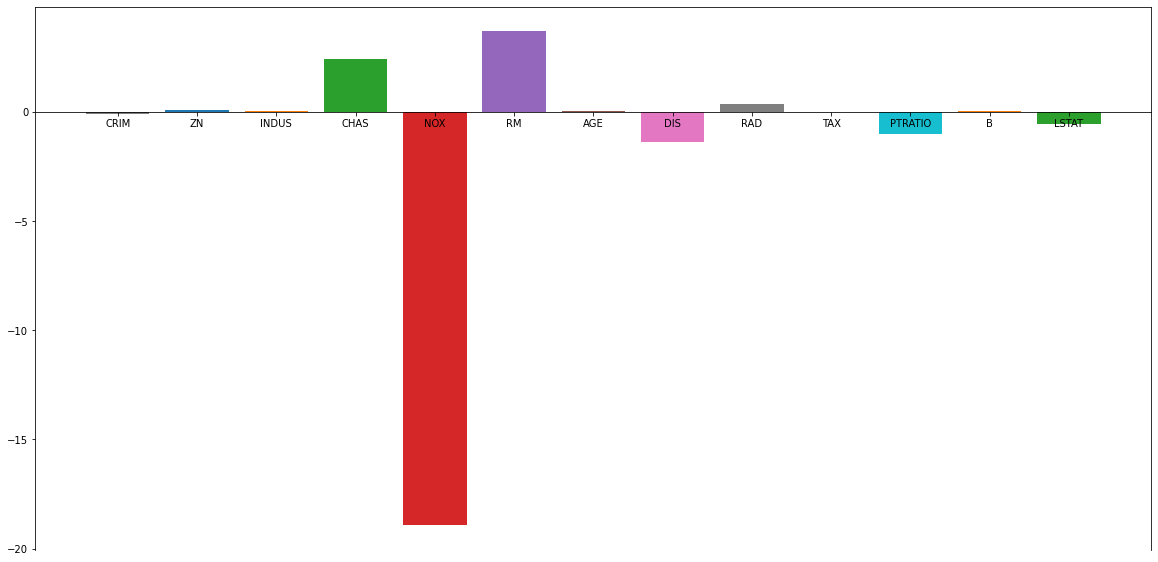

In [10]:
# Plotting the coefficient score

fig,ax=plt.subplots(figsize=(20,10))

color =["tab:gray", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink",
        "tab:gray", "tab:olive", "tab:cyan", "tab:orange", "tab:green", "tab:blue", "tab:olive"]

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient["Coefficient Estimate"],
color=color)

ax.spines["bottom"].set_position("zero")

plt.style.use("ggplot")
plt.show()

#### Now our motive is to reduce the coefficient score 

#### Ridge Regression

In [15]:
# Import ridge regression from sklearn library
from sklearn.linear_model import Ridge

#Train the model
ridgeR= Ridge(alpha=1)
ridgeR.fit(x_train, y_train)
y_pred=ridgeR.predict(x_test)

#Calculating Mean Squared Error(mse)
mean_squared_error_ridge=np.mean((y_pred-y_test)**2)
print("Mean squared Error on test set: ", mean_squared_error_ridge)

#get ridge coefficients and print them
ridge_coefficient=pd.DataFrame()
ridge_coefficient["Columns"]=x_train.columns
ridge_coefficient["Coefficient Estimate"]=pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared Error on test set:  18.4385213112839
    Columns  Coefficient Estimate
0      CRIM             -0.104922
1        ZN              0.053425
2     INDUS              0.004850
3      CHAS              2.161247
4       NOX            -10.201544
5        RM              3.708738
6       AGE              0.015807
7       DIS             -1.286488
8       RAD              0.345082
9       TAX             -0.016333
10  PTRATIO             -0.919355
11        B              0.009793
12    LSTAT             -0.583578


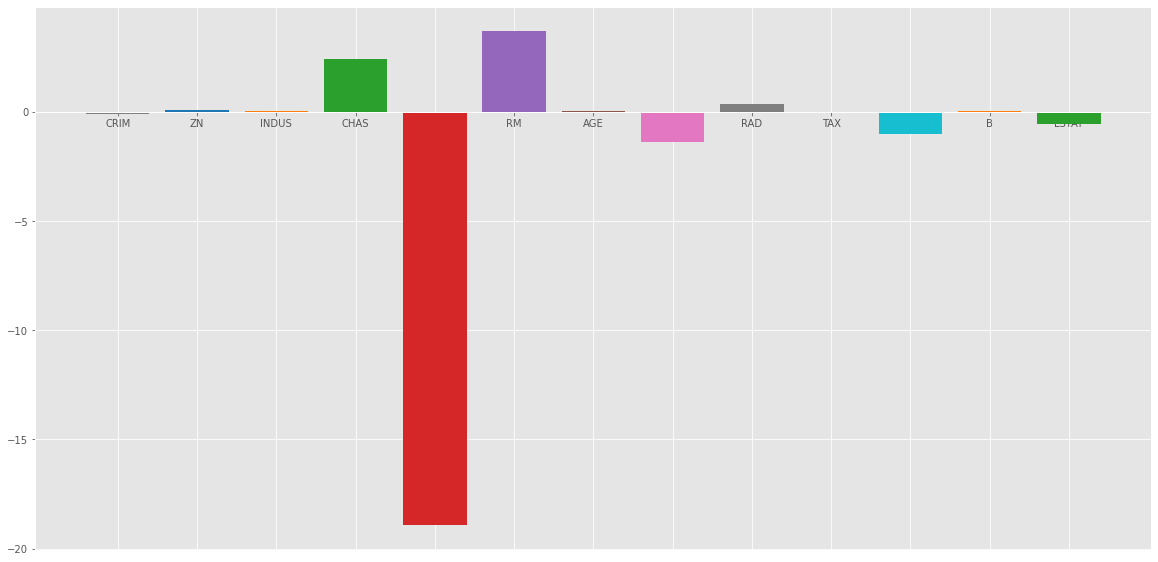

In [16]:
#Plotting the coefficient score

fig,ax=plt.subplots(figsize=(20,10))

color =["tab:gray", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink",
        "tab:gray", "tab:olive", "tab:cyan", "tab:orange", "tab:green", "tab:blue", "tab:olive"]

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient["Coefficient Estimate"],
color=color)

ax.spines["bottom"].set_position("zero")

plt.style.use("ggplot")
plt.show()

#### Lasso Regression

In [19]:
# Import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

#Train the model
lasso= Lasso(alpha=1)
lasso.fit(x_train, y_train)
y_pred1=lasso.predict(x_test)

#Calculating Mean Squared Error(mse)
mean_squared_error=np.mean((y_pred-y_test)**2)
print("Mean squared Error on test set: ", mean_squared_error)
lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"]=x_train.columns
lasso_coeff["Coefficient Estimate"]=pd.Series(lasso.coef_)
print(lasso_coeff)

Mean squared Error on test set:  18.4385213112839
    Columns  Coefficient Estimate
0      CRIM             -0.067425
1        ZN              0.051229
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.132608
6       AGE              0.040808
7       DIS             -0.612851
8       RAD              0.302533
9       TAX             -0.017864
10  PTRATIO             -0.775436
11        B              0.008230
12    LSTAT             -0.790007
